### **Nombre:** Elda Magally Calderón Motta
### **Carné:** 16003182
### **Sección:** U

# **TAREA 2**

# Reducción de Dimensionalidad con PCA y T-SNE

In [175]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [3]:
if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Imagenes
Las imagenes son Numpy Arrays de 28x28, los pixeles estan entre los valores de 0 a 255

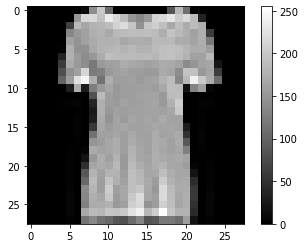

In [6]:
plt.imshow(train_images[10], cmap = 'gray')
plt.colorbar()

## Labels

In [7]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

| Label | Class       |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

## Data y Normalizacion

In [8]:
n = len(train_images)
shapeT = np.shape(train_images)
imagesT = train_images.reshape((n, -1))
labelsT = train_labels.reshape((n, -1))

## Funcion PCA

In [273]:
def func_PCA(df, num_dim):
    
    # Normalizacion de Datos
    imagesN = (df - df.mean(axis=0)) / df.std(axis=0)

    # Covarianza
    #sigma = np.matmul(imagesN.T,imagesN)[:,5] / shapeT[0] 
    sigma = np.cov(imagesN.T)

    # Eigenvectors & EigenValues
    eigVectors, eigValues, _ = np.linalg.svd(sigma)

    # Calculo PCA
    PCA = np.matmul(imagesN,eigVectors.T)
    X_reducido1 = PCA[:, 0:num_dim]
    
    # Varianza
    varianzaAcum = np.cumsum(eigValues) / np.sum(eigValues)
    varianza = varianzaAcum[num_dim-1]
    
    # Dimensionalidad para una varianza minima
    min_var = np.argmin(eigValues[np.cumsum(eigValues) / np.sum(eigValues) <= 0.8])
    
    print('Varianza:', varianza)
    print('Dimension varianza al 80%:', min_var)
    

    return(varianza, X_reducido1)

In [274]:
varianza, X_reducido1 = func_PCA(imagesT[0:5000,:], 2)

Varianza: 0.3660197995448245
Dimension varianza al 80%: 44


## Funcion t-sne

In [89]:
def func_tsne(df, num_dim):

    # Normalizacion de Datos
    imagesN = (df - df.mean(axis=0)) / df.std(axis=0)
    
    X_reducido2 = TSNE(n_components = num_dim, n_iter=250).fit_transform(imagesN[0:5000,:])
    
    return(X_reducido2)

In [88]:
X_reducido2 = func_tsne(imagesT[0:5000,:], 2)

## Comparacion entre Modelos

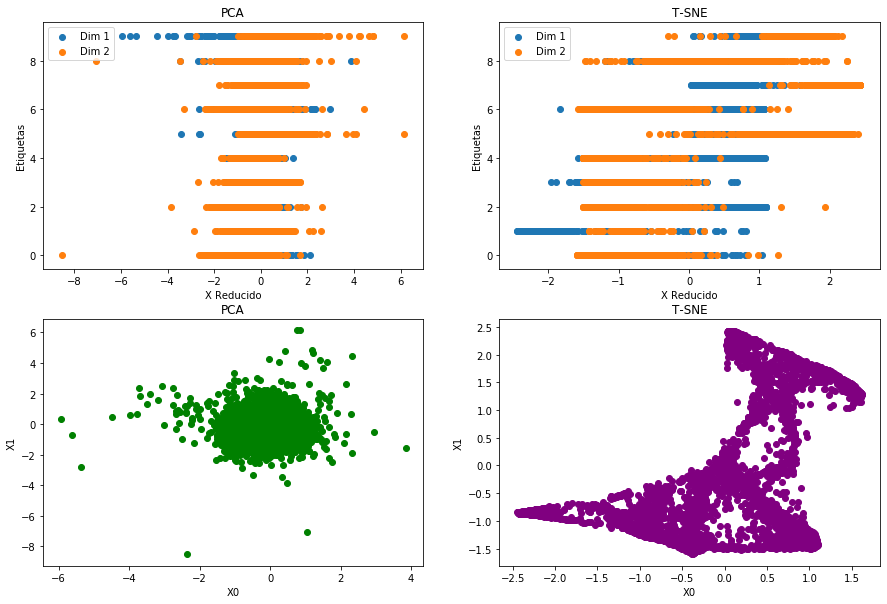

In [166]:
fig = plt.figure(figsize=(15,10))
ax0 = fig.add_subplot(2,2,1)
ax1 = fig.add_subplot(2,2,2)
ax2 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(2,2,4)

ax0.scatter(X_reducido1[:,0],labelsT[0:5000,:])
ax0.scatter(X_reducido1[:,1],labelsT[0:5000,:])
ax0.legend(('Dim 1', 'Dim 2'))
ax0.set_xlabel('X Reducido')
ax0.set_ylabel('Etiquetas')
ax0.set_title('PCA')

ax1.scatter(X_reducido2[:,0],labelsT[0:5000,:])
ax1.scatter(X_reducido2[:,1],labelsT[0:5000,:])
ax1.legend(('Dim 1', 'Dim 2'))
ax1.set_xlabel('X Reducido')
ax1.set_ylabel('Etiquetas')
ax1.set_title('T-SNE')

ax2.scatter(X_reducido1[:,0],X_reducido1[:,1], color='green')
ax2.set_xlabel('X0')
ax2.set_ylabel('X1')
ax2.set_title('PCA')

ax3.scatter(X_reducido2[:,0],X_reducido2[:,1], color='purple')
ax3.set_xlabel('X0')
ax3.set_ylabel('X1')
ax3.set_title('T-SNE')

plt.show()

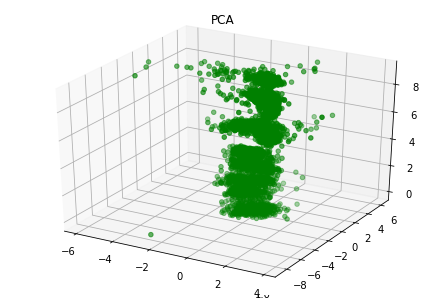

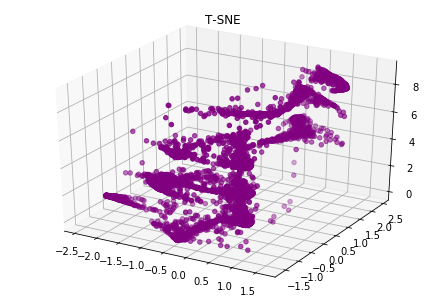

In [174]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = Axes3D(fig)
Axes3D(fig).scatter(X_reducido1[:,0],X_reducido1[:,1], labelsT[0:5000,:], color='green')
plt.title("PCA")
plt.show()

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_reducido2[:,0], X_reducido2[:,1], labelsT[0:5000,:], color='purple')
plt.title("T-SNE")
plt.show()



Observando los gráficos de los resultados de ambos algoritmos se puede visualizar que PCA reduce la dimensionalidad y concentra más los datos, lo que se puede observar al gráficar en un mismo plano las dimensiones a las que se redujo el dataset, donde la relación entre las variables es en forma circular.

Por otro lado, T-SNE muestra una relación diferente entre los datos. 

Al momento de realizar clustering con alguno de estos modelos es probable que con PCA sea más difícil visualizarlos ya que los datos están más concentrados, mientras que T-SNE podría brindar una mejor visualización de los clustering al desplegar de una forma diferente la información.

Por tanto, si además de reducir la dimensionalidad también es importante la visualización el algoritmo de T-SNE podría brindar mejores resultados según lo que se puede observar con estos resultados.

## Clustering

In [260]:
def func_cluster(df, k, label):

    kmeans = KMeans(n_clusters=k).fit(df)
    clusters = kmeans.predict(df)
    
    aciertos = np.count_nonzero(label[0:5000] == clusters.reshape(-1,1))

    # Grafico
    plt.scatter(df[:,1], df[:,0], c=clusters, s=25, cmap='viridis')
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.title('Clusters Prendas Modelo Reducido')
    plt.show()
    
    # Grafico
    plt.scatter(df[:,1], df[:,0], c=label[0:5000].reshape(len(label)), s=25, cmap='viridis')
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.title('Clusters Prendas Real')
    plt.show()
    
    print('Aciertos:', aciertos)

    return(clusters, aciertos)

### Modelo PCA

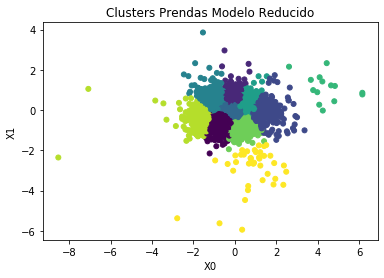

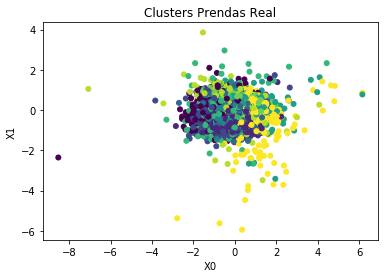

Aciertos: 483


In [283]:
cluster1, acierto1 = func_cluster(X_reducido1, 10, labelsT[0:5000])

### Modelo T-SNE

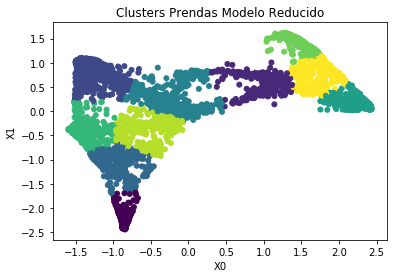

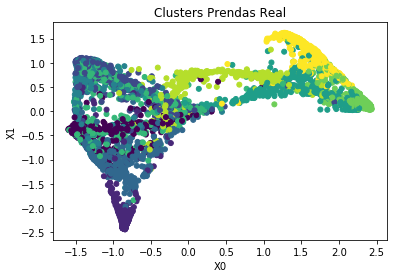

Aciertos: 1313


In [282]:
cluster2, acierto2 = func_cluster(X_reducido2, 10, labelsT[0:5000])

## Conclusiones

Al realizar clustering con la versión reducida tanto con los modelos PCA y T-SNE se puede observar que el modelo que T-SNE tiene una mayor tasa de acierto que PCA.

T-SNE acertó en 1313 observaciones de 5000, mientras que PCA únicamente en 483. Esto equivale al 26% y 9% respectivamente.
Se puede concluir entonces que el modelo que brinda mejores resultados para este experimento es T-SNE, incluso si es importante la visualización de datos se despliegan mejor con este.

Algo importante a mencionar es que el dataset original contaba con 784 features, de las cuales se redujeron únicamente a 2 dimensiones, por lo que los resultados del cluster podrían verse como bajos pero no tanto considerando el nivel de dimensionalidad del dataset original. Por lo que estos modelos pueden brindar aproximaciones muy buenas si se aumentara más la cantidad de features a considerar.

Para estos experimentos se conservaron únicamente 2 features, con lo cual el modelo PCA conserva aproximadamente el 36% de varianza o de información, por lo que aumentando la cantidad de variables podría ajustarse mejor. Incluso no tendria que aumentarse tanto, con PCA se hizo el experimento para conservar al menos el 80% de varianza y para lograrlo hay que tener una dimensionalidad de 44 features, lo cual es un número significativamente menor de dimensionalidad del dataset. Si esto se aplica con el modelo de T-SNE se podrían obtener aún mejores resultados.

Por lo que para concluir, con estos experimentos se puede observar que los algoritmos para reducción de dimensionalidad son realmente efectivos para simplificar la complejidad de un fenómeno y a su vez los modelos que se pueden generar sobre el mismo.



*Observación: Se hicieron los experimentos sobre 5000 observaciones del dataset original por cuestiones de tiempo*